In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from make_transition_matrix import *

In [3]:
kbc = 1.
kac = 1.
Eac = 0.1
V0 = 1.

X0 = -5 # left most boundary condition
Xf = 5 # right most boundary at which we will perform the numerical resolution
n = 100 # number of point use for space
dx = (Xf-X0)/n # size of the step

## Equation differential of the problem :
$$ 
\partial_t \rho_a = \partial_x^2 \rho_a +\partial_x[\rho_a \partial_x V]
$$


In [4]:
"""
def V(x) :
    if x<0:
        return 0.
    else :
        return V0
dV = lambda x : 0
ddV = lambda x : 0
"""
V = lambda x : 0.5*(1+np.tanh(x)) * V0
dV = lambda x : 0.5/np.cosh(x)**2 * V0
ddV = lambda x : -1/np.cosh(x)**2 * np.tanh(x) * V0

In [5]:
def make_transition_matrix_2(V,dV,X0,Xf,n):
    matrix = np.zeros((n,n),dtype=float)
    dx = (Xf-X0)/n
    for i in range(n):
        # make the "a" transition
        x = i*dx+X0
        if i!=0 and i!=n-1:
            matrix[i,i] += -2/dx**2 -dV(x)/dx
            matrix[i,i+1] += 1/dx**2+dV(x+dx)/dx
            matrix[i,i-1] += 1/dx**2
        elif i == 0:
            # boundary condition in x = x0 and Xf
            matrix[i,i] += -1/dx**2#- dV(x) / (dx)
            matrix[i,i+1] += 1/dx**2+dV(x+dx)/dx
        elif i == n-1:
            # boundary condition in x = x0 and Xf
            matrix[i,i] += -1/dx**2-dV(x)/dx
            matrix[i,i-1] += 1/dx**2#- dV(x-dx) / (dx)
    return matrix

In [6]:
ra_no_norm = lambda x : kac * np.exp(-Eac) * 1 + kbc*1 + kbc*kac*np.exp(-Eac)
rb_no_norm = lambda x : kac*np.exp(-Eac)*np.exp(V(x))+np.exp(V(x))*kbc+kac*np.exp(V(x))*kbc
rc_no_norm = lambda x : kac*np.exp(V(x))*kbc+1*kac*np.exp(V(x))+np.exp(V(x))*kbc
S = lambda x : ra_no_norm(x)+rb_no_norm(x)+rc_no_norm(x)
ra_infty = lambda x : ra_no_norm(x)/S(x)
rb_infty = lambda x : rb_no_norm(x)/S(x)
rc_infty = lambda x :rc_no_norm(x)/S(x)

rho_eq = np.zeros(n,dtype=float)
for i in range(n):
    rho_eq[i] = ra_infty(i*dx+X0)
    #rho_eq[i+n] = rb_infty(i*dx+X0)
    #rho_eq[i+2*n] = rc_infty(i*dx+X0)

In [7]:
mat = make_transition_matrix_2(V,dV,X0,Xf,n)

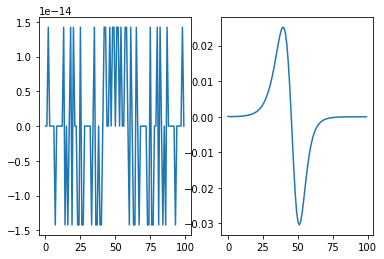

In [8]:
fig,ax = plt.subplots(ncols= 2)
ax[0].plot(np.sum(mat,axis=0))
ax[1].plot(np.dot(mat,rho_eq))


In [9]:
v,w = la.eig(mat)
for i in range(v.shape[0]):
    w[:,i] = abs(w[:,i])/sum(abs(w[:,i]))

In [14]:
rho_eq = rho_eq/sum(rho_eq)
diff_eq = np.exp(-V(np.linspace(X0,Xf,n)))
diff_eq = abs(diff_eq)/sum(diff_eq)

In [15]:
print(v[np.argsort(v)][-1])

9.915711173594775e-14


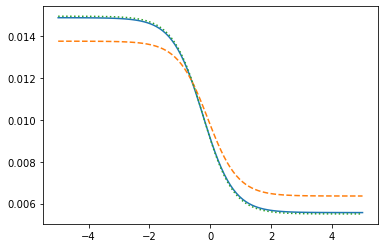

In [17]:
plt.plot(np.linspace(X0,Xf,n),np.real(w[:,np.argsort(v)[-1]][:n]))

plt.plot(np.linspace(X0,Xf,n),rho_eq[:n],linestyle='--')
plt.plot(np.linspace(X0,Xf,n),diff_eq,linestyle=':')
#plt.plot(np.linspace(X0,Xf,n),V(np.linspace(X0,Xf,n))/sum(V(np.linspace(X0,Xf,n))))